In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/AI_HACKATHON_NEWBEES'

/content/drive/.shortcut-targets-by-id/1-4ii3uVRlACOP48-FWHqr-aYnpn7FvB0/AI_HACKATHON_NEWBEES


In [ ]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import dlib
import os

In [ ]:
data_dir = '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/'

In [ ]:
label_train = pd.read_csv('./data_processed/labels_train.csv')
label_test = pd.read_csv('./data_processed/labels_test.csv')

label_train.head(5)

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
0,100013282.jpg,1333,2000,"[934.0000000000097, 144.82228672769534, 238.24...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
1,100016175.jpg,1333,2000,"[1094.0513571635438, 422.91772295627203, 55.45...",20-30s,Caucasian,unmasked,light,Neutral,Male
2,10004189.jpg,2000,1333,"[419.93871061403877, 269.1250391680045, 377.19...",20-30s,Mongoloid,unmasked,light,Happiness,Female
3,100104600.jpg,2000,1333,"[549.169724453414, 92.52040334013152, 306.8821...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female
4,10012376.jpg,2000,1333,"[640.2165901410499, 619.7806050101991, 359.991...",20-30s,Mongoloid,unmasked,light,Happiness,Female


In [ ]:
label_train['race'].value_counts()

Mongoloid    6021
Caucasian    5670
Negroid       554
Name: race, dtype: int64

In [ ]:
dir_img_train = glob('/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/*.jpg')

In [ ]:
if '/content/drive/MyDrive/AI_HACKATHON_NEWBEES/data_processed/train_crop_align/image_2209.jpg' in dir_img_train:
    print("exist")
else:
    print("not exist")

exist


In [ ]:
img_train_list = [os.path.basename(file_path) for file_path in dir_img_train]

In [ ]:
len(img_train_list)

11707

In [ ]:
single_label = pd.read_csv(data_dir + 'single_label.csv')
single_label = single_label[single_label['file_name'].isin(img_train_list)]
single_label

,file_name,height,width,bbox,age,race,masked,skintone,emotion,gender
0,100013282.jpg,1333,2000,"[934.0000000000097, 144.82228672769534, 238.24...",20-30s,Caucasian,unmasked,mid-light,Neutral,Male
1,100016175.jpg,1333,2000,"[1094.0513571635438, 422.91772295627203, 55.45...",20-30s,Caucasian,unmasked,light,Neutral,Male
2,10004189.jpg,2000,1333,"[419.93871061403877, 269.1250391680045, 377.19...",20-30s,Mongoloid,unmasked,light,Happiness,Female
3,100104600.jpg,2000,1333,"[549.169724453414, 92.52040334013152, 306.8821...",20-30s,Caucasian,unmasked,mid-light,Happiness,Female
4,10012376.jpg,2000,1333,"[640.2165901410499, 619.7806050101991, 359.991...",20-30s,Mongoloid,unmasked,light,Happiness,Female
...,...,...,...,...,...,...,...,...,...,...
11906,image_2713.jpg,1024,1024,"[244.71717171717162, 176.66666666666654, 587.2...",40-50s,Caucasian,unmasked,mid-light,Happiness,Male
11907,image_3332.jpg,1024,1024,"[265.6338028169031, 174.2441314553992, 584.727...",Senior,Caucasian,unmasked,light,Happiness,Female
11908,image_6905.jpg,1024,1024,"[251.3434343434343, 184.7171717171712, 500.535...",20-30s,Caucasian,unmasked,light,Neutral,Male
11909,image_4080.jpg,1024,1024,"[222.72727272727235, 179.8181818181809, 586.90...",Kid,Caucasian,unmasked,light,Happiness,Female


In [ ]:
single_label['race'].value_counts()

Mongoloid    5775
Caucasian    5409
Negroid       523
Name: race, dtype: int64

# Creat folder to split data

In [ ]:
data_crop_dir = data_dir + 'train_crop_align/'

In [ ]:
# import shutil

# male_folder = data_dir + 'gender_data/Male'
# female_folder = data_dir + 'gender_data/Female'

# os.makedirs(male_folder)
# os.makedirs(female_folder)

# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']

#     gender = row['gender']
#     if gender == 'Male':
#         shutil.copy(file_name, os.path.join(male_folder, os.path.basename(file_name)))
#     elif gender == 'Female':
#         shutil.copy(file_name, os.path.join(female_folder, os.path.basename(file_name)))

In [ ]:
# caucasian_folder = data_dir + 'race_data/Caucasian'
# mongoloi_folder = data_dir + 'race_data/Mongoloid'
# negroid_folder = data_dir + 'race_data/Negroid'

# os.makedirs(caucasian_folder)
# os.makedirs(mongoloi_folder)
# os.makedirs(negroid_folder)

# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']

#     race = row['race']
#     if race == 'Caucasian':
#         shutil.copy(file_name, os.path.join(caucasian_folder, os.path.basename(file_name)))
#     elif race == 'Mongoloid':
#         shutil.copy(file_name, os.path.join(mongoloi_folder, os.path.basename(file_name)))
#     elif race == 'Negroid':
#         shutil.copy(file_name, os.path.join(negroid_folder, os.path.basename(file_name)))

In [ ]:
# baby_folder = data_dir + 'age_data/Baby'
# kid_folder = data_dir +'age_data/Kid'
# teen_folder = data_dir +'age_data/Teenager'
# _2030_folder = data_dir +'age_data/20-30s'
# _4050_folder = data_dir +'age_data/40-50s'
# senior_folder = data_dir + 'age_data/Senior'

# os.makedirs(male_folder)
# os.makedirs(female_folder)

# for index, row in single_label.iterrows():
#     file_name = data_crop_dir + row['file_name']

#     gender = row['gender']
#     if gender == 'Male':
#         shutil.copy(file_name, os.path.join(male_folder, os.path.basename(file_name)))
#     elif gender == 'Female':
#         shutil.copy(file_name, os.path.join(female_folder, os.path.basename(file_name)))

# Race Prediction

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input,Activation,Add
from keras.layers import Conv2D,MaxPooling2D,AvgPool2D,GlobalAveragePooling2D,Dense,Dropout,BatchNormalization,Flatten,Input
from tensorflow.keras import utils
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.regularizers import l2

##Define Race Classes

In [ ]:
def class_labels_reassign(race):

    if race == 'Caucasian':
        return 0
    elif race == 'Mongoloid':
        return 1
    elif race == 'Negroid':
        return 2

In [ ]:
race_df = pd.DataFrame()
race_df['file_name'] = single_label['file_name']
race_df['race'] = single_label['race']

In [ ]:
race_df['target'] = race_df['race'].map(class_labels_reassign)
race_df

,file_name,race,target
0,100013282.jpg,Caucasian,0
1,100016175.jpg,Caucasian,0
2,10004189.jpg,Mongoloid,1
3,100104600.jpg,Caucasian,0
4,10012376.jpg,Mongoloid,1
...,...,...,...
11906,image_2713.jpg,Caucasian,0
11907,image_3332.jpg,Caucasian,0
11908,image_6905.jpg,Caucasian,0
11909,image_4080.jpg,Caucasian,0


# Prepare Dataset

In [ ]:
X = race_df['file_name'].to_list()
y = race_df['target'].to_list()

In [ ]:
X = [data_crop_dir + file_name for file_name in X]

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=12)

In [ ]:
X_train_tensor = tf.constant(X_train)
y_train_tensor = tf.constant(y_train)

X_val_tensor = tf.constant(X_val)
y_val_tensor = tf.constant(y_val)

In [ ]:
# Image Gray scale
num_classes = 3

def _parse_function(filename, label):

    image_string = tf.io.read_file(filename)
    image_decoded = tf.io.decode_jpeg(image_string, channels=3)    # channels=1 to convert to grayscale, channels=3 to convert to RGB.
    # image_resized = tf.image.resize(image_decoded, [200, 200])
    label = tf.one_hot(label, num_classes)

    return image_decoded, label

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_tensor, y_train_tensor))
train_dataset = train_dataset.map(_parse_function)

train_dataset = train_dataset.batch(32)    # Same as batch_size hyperparameter in model.fit() below.

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_tensor, y_val_tensor))
val_dataset = val_dataset.map(_parse_function)

val_dataset = val_dataset.batch(32)

In [ ]:
train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, None, None, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

# Model

## VGG-19

In [ ]:
import keras.layers
from keras.applications import VGG19
from keras.applications.vgg19 import preprocess_input

vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

80134624/80134624 [==============================] - 3s 0us/step


In [ ]:
for layer in vgg19.layers:
    layer.trainable = False


x = Flatten()(vgg19.output)
prediction = Dense(3, activation='softmax')(x)

In [ ]:
model = keras.Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

## Custom CNN

In [ ]:
input = Input(shape = (256,256,1))

conv1 = Conv2D(32,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(input)
conv1 = Dropout(0.1)(conv1)
conv1 = Activation('relu')(conv1)
pool1 = MaxPooling2D(pool_size = (2,2)) (conv1)

conv2 = Conv2D(64,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool1)
conv2 = Dropout(0.1)(conv2)
conv2 = Activation('relu')(conv2)
pool2 = MaxPooling2D(pool_size = (2,2)) (conv2)

conv3 = Conv2D(128,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool2)
conv3 = Dropout(0.1)(conv3)
conv3 = Activation('relu')(conv3)
pool3 = MaxPooling2D(pool_size = (2,2)) (conv3)

conv4 = Conv2D(256,(3, 3), padding = 'same', strides=(1, 1), kernel_regularizer=l2(0.001))(pool3)
conv4 = Dropout(0.1)(conv4)
conv4 = Activation('relu')(conv4)
pool4 = MaxPooling2D(pool_size = (2,2)) (conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128,activation='relu')(flatten)

drop_1 = Dropout(0.2)(dense_1)

output = Dense(2,activation="sigmoid")(drop_1)

In [ ]:
model = tf.keras.Model(inputs=input,outputs=output)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 dropout (Dropout)           (None, 256, 256, 32)      0         
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                           

In [ ]:
#optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.0001)

In [ ]:
tensorboard = TensorBoard(log_dir=f"/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/race_model")

In [ ]:
checkpoint = ModelCheckpoint(filepath=f"/content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/race_model/race_vgg19_checkpoint.h5",
                             monitor='val_accuracy',
                             save_best_only=True,
                             save_weights_only=False,
                             verbose=1
                            )

In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Train model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_history = model.fit(train_dataset,
                                  batch_size=64,
                                  validation_data=val_dataset,
                                  epochs=20,
                                  callbacks=[tensorboard, checkpoint, early_stop],
                                  shuffle=False    # shuffle=False to reduce randomness and increase reproducibility
                                 )

Epoch 1/20
293/293 [==============================] - ETA: 0s - loss: 8.4939 - accuracy: 0.7385
Epoch 1: val_accuracy improved from -inf to 0.78523, saving model to /content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/race_model/race_model_checkpoint.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


293/293 [==============================] - 368s 1s/step - loss: 8.4939 - accuracy: 0.7385 - val_loss: 7.4900 - val_accuracy: 0.7852
Epoch 2/20
293/293 [==============================] - ETA: 0s - loss: 3.5846 - accuracy: 0.8723
Epoch 2: val_accuracy did not improve from 0.78523
293/293 [==============================] - 71s 243ms/step - loss: 3.5846 - accuracy: 0.8723 - val_loss: 13.5827 - val_accuracy: 0.7434
Epoch 3/20
293/293 [==============================] - ETA: 0s - loss: 3.2134 - accuracy: 0.8926
Epoch 3: val_accuracy improved from 0.78523 to 0.82366, saving model to /content/drive/MyDrive/AI_HACKATHON_NEWBEES/Log_Output/race_model/race_model_checkpoint.h5
293/293 [==============================] - 71s 242ms/step - loss: 3.2134 - accuracy: 0.8926 - val_loss: 8.8381 - val_accuracy: 0.8237
Epoch 4/20
293/293 [==============================] - ETA: 0s - loss: 3.2370 - accuracy: 0.9105
Epoch 4: val_accuracy improved from 0.82366 to 0.82494, saving model to /content/drive/MyDrive/AI

# Performance

In [ ]:
train_loss = model_history.history['loss']
test_loss = model_history.history['val_loss']
train_accuracy = model_history.history['accuracy']
test_accuracy = model_history.history['val_accuracy']

Text(0.5, 0.92, 'Loss and accuracy of VGG19 model by epochs')

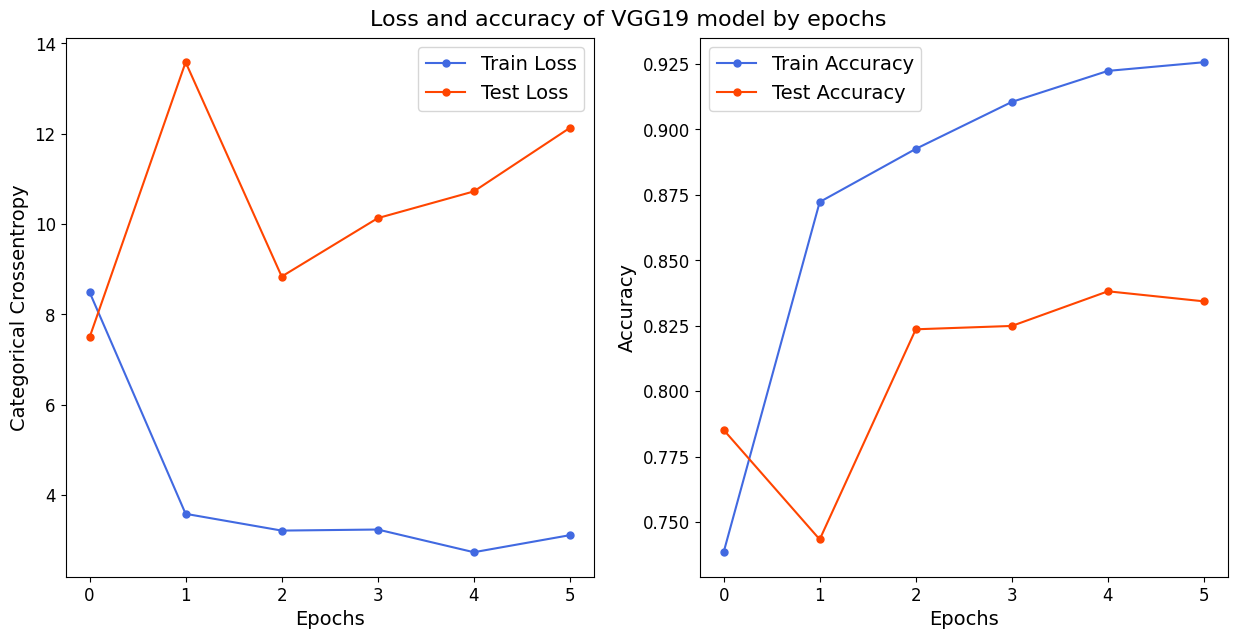

In [ ]:
fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax = ax.ravel()

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(test_loss, label='Test Loss', color = 'orangered', marker='o', markersize=5)

ax[0].set_xlabel('Epochs', fontsize=14)
ax[0].set_ylabel('Categorical Crossentropy', fontsize=14)

ax[0].legend(fontsize=14)
ax[0].tick_params(axis='both', labelsize=12)

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(test_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)

ax[1].set_xlabel('Epochs', fontsize=14)
ax[1].set_ylabel('Accuracy', fontsize=14)

ax[1].legend(fontsize=14)
ax[1].tick_params(axis='both', labelsize=12)

fig.suptitle(x=0.5, y=0.92, t="Loss and accuracy of VGG19 model by epochs", fontsize=16)

In [ ]:
model_score = model.evaluate(val_dataset, verbose=1)

74/74 [==============================] - 14s 191ms/step - loss: 12.1301 - accuracy: 0.8343


# Confusion Matrix

In [ ]:
final_pred = model.predict(val_dataset)
final_pred = final_pred.argmax(axis=-1)

74/74 [==============================] - 14s 193ms/step


In [ ]:
conf_mat = confusion_matrix(y_val, final_pred)
conf_mat

array([[ 846,  196,   11],
       [ 134, 1038,    6],
       [  26,   15,   70]])

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', export_as='confusion_matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True labels', fontsize=14)
    plt.xlabel('Predicted labels', fontsize=14)

Normalized confusion matrix


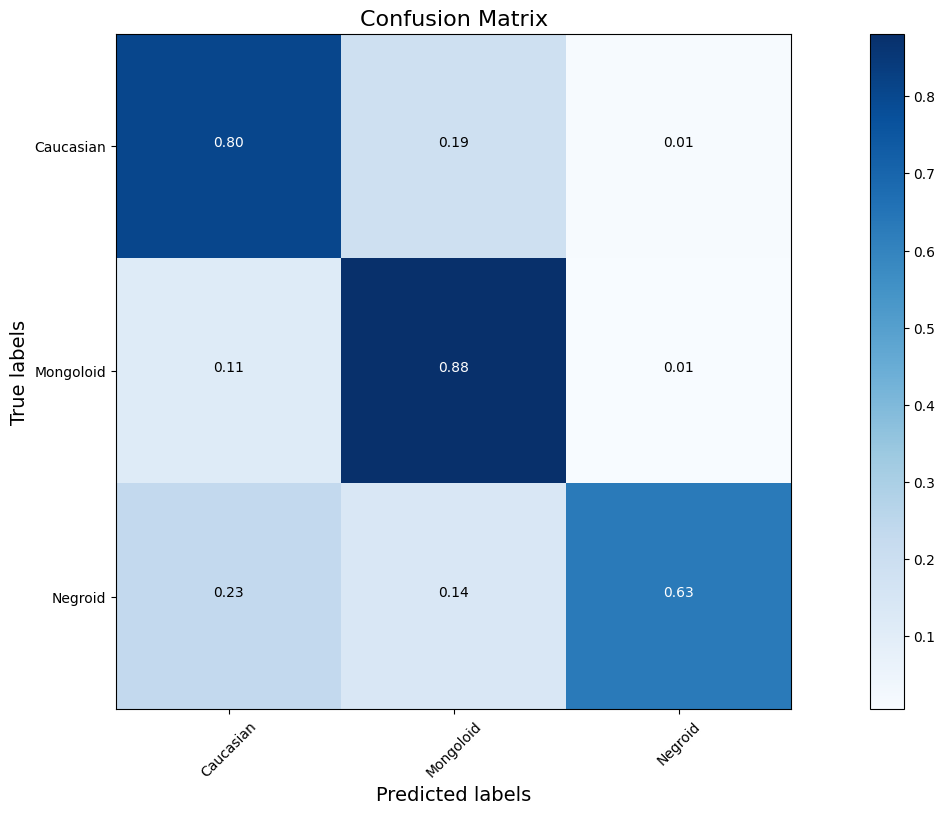

In [ ]:
# Plotting the confusion matrix using the function defined above.

cm_plot_labels = ['Caucasian', 'Mongoloid', 'Negroid']

plt.figure(figsize=(16,8))
plot_confusion_matrix(conf_mat, cm_plot_labels, normalize=True,
                      title="Confusion Matrix",
                      export_as="final_cnn_conf_mat_norm"
                     )

plt.show()